# FaIR: Finite Amplitude Impulse Response Model

This notebook is based on a notebook developed by Chris Smith for [FaIR](https://github.com/OMS-NetZero/FAIR). 

*Note: to run FaIR, you will need to install the python package. Activate your man_ccia environment and then type
`pip install fair` using the Terminal for Macs or the Anaconda prompt for PCs*

"The Finite Amplitude Impulse Response (FaIR) model is a simple emissions-based climate model. It allows the user to input emissions of greenhouse gases and short-lived climate forcers in order to estimate global and annual mean atmospheric greenhouse gas (GHG) concentrations, radiative forcing and temperature anomalies.

The original FaIR model (v1.0) was developed to simulate the earth system response to CO$_2$ emissions, with all non-CO$_2$ forcing implemented as an "external" source. It was developed by Richard Millar, Zebedee Nicholls, Pierre Friedlingstein and Myles Allen. The motivation for developing it and its formulation is documented in a paper published in Atmospheric Chemistry and Physics in 2017 ([doi:10.5194/acp-2016-405](doi:10.5194/acp-2016-405)).

In this lab and the remaining labs, we will use the updated emissions-based FaIR model. The emissions-based model extends FaIR by replacing all sources of non-CO$_2$ forcing with relationships that are based on the source emissions, with the exception of natural forcings (i.e., variations in solar irradiance and volcanic eruptions). It is useful for assessing future policy commitments to anthropogenic emissions (something which we can control) than to radiative forcing (something which is less certain and which we can only partially control).

The emissions-based model was developed by Chris Smith with input from Piers Forster, Leighton Regayre and Giovanni Passerello, in parallel with Nicolas Leach, Richard Millar and Myles Allen." - *description taken from [FaIR](https://github.com/OMS-NetZero/FAIR)*

## What is included in FaIR:

FaIR represents the globally-averaged, annually-averaged climate. Numerically, it consists of different carbon reservoirs in the Earth system, the exchanges between these and the atmosphere and their residence times in order to derive atmospheric concentrations and radiative forcing from emissions. The model then represents the climate as a two-box system and distributes the radiative forcing between these boxes a surface box and a deep ocean box where heat can be stored.

## What is not included in FaIR:

FaIR is not an Earth System Model like those used for the coupled model intercomparison projects (e.g. CMIP6). It has no horizontal resolution and only two vertical layers, the two boxes. It has no representation of atmospheric, oceanic or cryospheric dynamics. 

*For more information, see the documentation above.*

#### FaIR is a very simple climate model, but it will allow us to explore theoretical concepts using a simple python interface and without taking days to weeks for computations to complete.

In [2]:
# import packages
import fair
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

## Model Validation

One of the key steps in model development is validation. Development is an iterative process. Examination of how a model performs relative to nature and the desire and need to improve model performance drives development. 

To start, we will first examine how well FaIR does at simulating CO$_2$ concentrations and globally and annually averaged temperature anomalies for the historical time period. 

We will use three different data sets to do this:

1. annual mean atmospheric CO$_2$ concentrations from the Mauna Loa Observatory (MLO) (1959-2020)
2. GISTEMP global and annual mean temperature anomalies (1880-2020)
2. HadCRUT5 global and annual mean temperature anomalies (1850-2020)


### Validation of CO$_2$ Concentrations

Remember that FaIR uses *emissions* as the input, rather than concentrations, so checking that FaIR is getting the CO$_2$ concentrations correct, is the first step in the validation process.

We can run FaIR for one of the representative concentration pathway (RCP) scenarios, RCP8.5, which includes the historical time period (from 1765-2005). To run FaIR, we use the function `fair_scm()`. These RCP scenarios were used for climate model projections in CMIP5. We will talk more about these later in the semester.

By default, volcanic and solar forcing plus natural emissions of methane and nitrous oxide are switched on.

In [3]:
from fair.RCPs import rcp85

# To run FaIR we call fair_scm() and the input is the emissions
# the output include the concentrations, the radiative forcing and the temperature anomalies

C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)

**Note that `C85` and `F85` are 2-D arrays. The rows represent time and the columns represent each individual forcing, e.g. CO$_2$, CH$_4$, N$_2$O, etc. `T85` is just a 1-D array of temperature anomalies for each year.**

Now, let's just extract the variables for years that overlap with our observational data, the years 1850-2020. Remember that the FaIR integrations start from the year 1765.

In [4]:
# define start and end years for historical period
yr_is = 85 #1850
yr_ie = 256 #2020

# years
year_hist = rcp85.Emissions.year[yr_is:yr_ie]

# CO2 Emissions
CO2E_hist = rcp85.Emissions.co2_fossil[yr_is:yr_ie]

# all GHG concentrations (CO2 is the first element of the second dimension)
C85_hist = C85[yr_is:yr_ie,:]

# Radiative forcing (RF for CO2 is the first element of the second dimension)
F85_hist = F85[yr_is:yr_ie,:]

# Temperature Anomalies
T85_hist = T85[yr_is:yr_ie]

Next, let's plot the historical CO$_2$ emissions and concentrations:

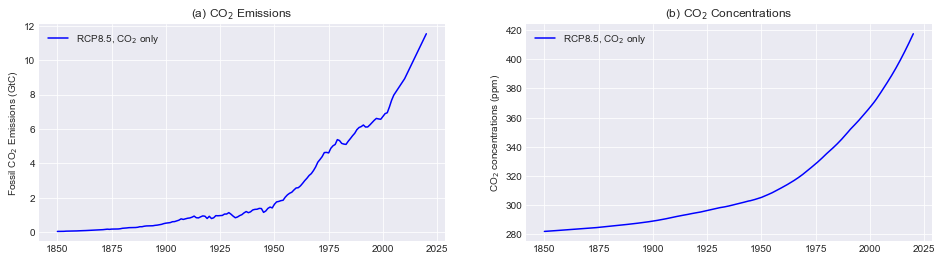

In [5]:
# plot historical annual CO2 emissions and concentrations
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot CO2 emissions
ax1.plot(year_hist, CO2E_hist, color='blue', label='RCP8.5, CO$_2$ only')

# plot CO2 concentrations
ax2.plot(year_hist, C85_hist[:,0], color='blue', label='RCP8.5, CO$_2$ only')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.set_title('(a) CO$_2$ Emissions')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax2.set_title('(b) CO$_2$ Concentrations')
ax2.legend()
plt.show()

Let's compare the concentrations with the Mauna Loa Observatory (MLO) data. We will need to read in the Mauna Loa data:

In [6]:
# read in MLO co2 concentrations
mlo_co2 = np.genfromtxt('mlo_co2.csv',delimiter=',')

Check the shape of the MLO data. What do we have? We should have two columns of data, one showing the year and one showing the concentrations.

Let's add these data to our plot:

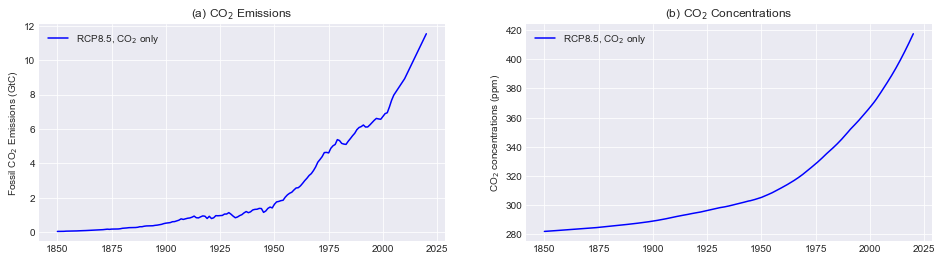

<Figure size 1152x648 with 0 Axes>

In [230]:
# plot annual CO2 emissions and concentrations
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot CO2 emissions
ax1.plot(year_hist, CO2E_hist, color='blue', label='RCP8.5, CO$_2$ only')

# plot CO2 concentrations
ax2.plot(year_hist, C85_hist[:, 0], color='blue', label='RCP8.5, CO$_2$ only')
# add MLO data to ax2

# add the MLO data to the plot
# complete the plotting line...

#ax2.plot(...,color='cyan', label='MLO')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.set_title('(a) CO$_2$ Emissions')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax2.set_title('(b) CO$_2$ Concentrations')
ax2.legend()
plt.show()
plt.savefig("Fig1.png")

It looks like there is a bit of a difference between the model and the observations - the observations seem to be slighty higher than the model for most of the overlapping time period. To see how large the difference is, let's compute the model ***bias***.

$$
\overline{[CO_2]_{Bias}} = \overline{[CO_2]_{FaIR}} - \overline{[CO_2]_{obs}}
$$

where $[...]$ indicates concentration and $\overline{(...)}$ indicates a long-term or *climatological* average. 

Let's take the long-term average over a typical representative time period, 1961-1990. Note that beyond the year 2005, the historical time period ends and the RCP scenarios begin, so we might not expect perfect agreement beyond 2005.

Slice your two data sets to extract the 1961-1990 time period and compute the CO$_2$ concentration bias.

In [231]:
# compute the bias for 1961-1990

#co2_bias = 
#print("The FaIR [CO$_2$] bias is ", np.round(co2_bias,2), " ppm.")

What do you get? Is FaIR underestimating or overestimating [CO$_2$] for this time period?

If we want to know what is causing the bias, this would require more investigation. For now, we will just quantify the bias and be relatively satisfied that the model and the observations are in pretty good agreement.

We could do the same bias calculation for the other GHGs, but for this lab, we will just stick with CO$_2$.

### Validation of Temperature Anomalies

Now, we are going to see how well FaIR represents the global and annual surface temperature anomalies. 

Let's start by adding the historical radiative forcing and temperature anomalies from FaIR to our plot:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


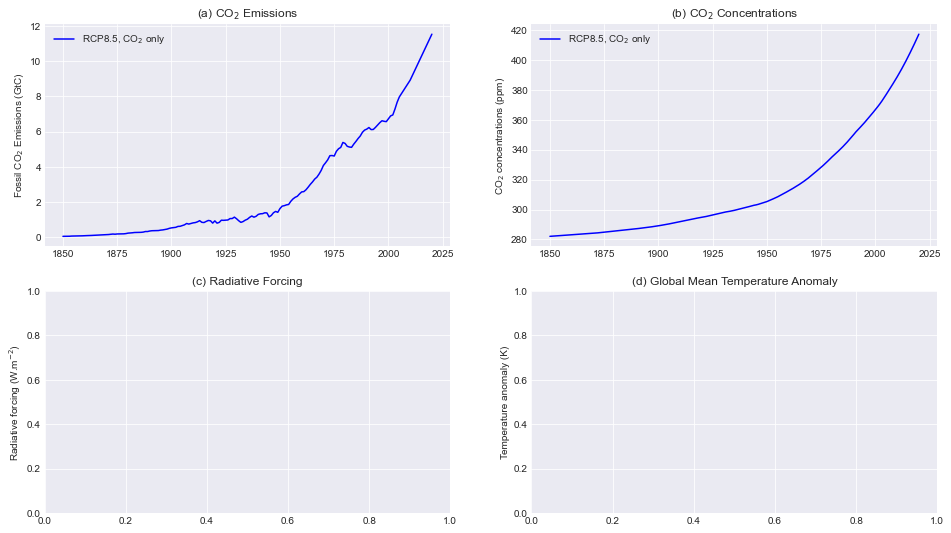

<Figure size 1152x648 with 0 Axes>

In [232]:
# plot everything (E, C, F, T)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# plot CO2 emissions
ax1.plot(year_hist, CO2E_hist, color='blue', label='RCP8.5, CO$_2$ only')

# plot CO2 concentrations
ax2.plot(year_hist, C85_hist[:, 0], color='blue', label='RCP8.5, CO$_2$ only')
# add MLO data to ax2
#ax2.plot(...,color='cyan', label='MLO')

# plot total radiative forcing, i.e. the sum of all columns of the F85_hist array
#ax3.plot(..., color='r', label='RCP8.5')

# plot RF just for CO2
#ax3.plot(..., color='blue',label="RCP8.5, CO$_2$ only")

# plot temperature anomalies
#ax4.plot(..., color='r', label='RCP8.5')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.set_title('(a) CO$_2$ Emissions')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax2.set_title('(b) CO$_2$ Concentrations')
ax2.legend()
ax3.set_ylabel('Radiative forcing (W.m$^{-2}$)')
ax3.set_title('(c) Radiative Forcing')
ax3.legend()
ax4.set_ylabel('Temperature anomaly (K)')
ax4.set_title('(d) Global Mean Temperature Anomaly')
ax4.legend()
plt.show()
plt.savefig("Fig2.png")

Great! The RF and temperature anomalies look reasonable, but let's quantify this.

We are going to compute the surface temperature bias, just as we did for the [CO$_2$] bias.

Let's read in our two surface temperature data sets:

In [233]:
# read surface temperature data

T_gis = np.genfromtxt('GLB.Ts+dSST.csv',delimiter=',') #anomalies relative to 1951-1980
T_had = np.genfromtxt('HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv',delimiter=',') #anomalies relative to 1961-1990

Check the shape of this data sets. What does each column represent? You may want to print out each column.

Before we add these time series to our plot to compare with FaIR, let's plot them separately first.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


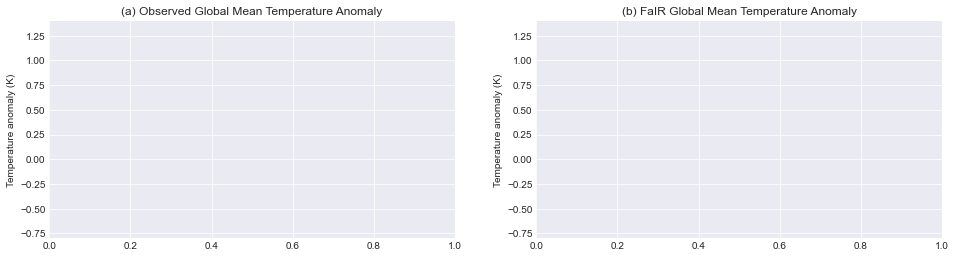

<Figure size 1152x648 with 0 Axes>

In [234]:
# plot annual CO2 emissions and concentrations
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot observational temperature anomalies
#ax1.plot(...,color='m',label="GISTEMP")
#ax1.plot(...,color='orange',label="HadCRUT5")

# plot FaIR temperature anomalies
#ax2.plot(..., color='r', label='RCP8.5')

ax1.set_ylabel('Temperature anomaly (K)')
ax1.set_title('(a) Observed Global Mean Temperature Anomaly')
ax1.set_ylim(-0.8,1.4)
ax1.legend(loc="upper left")

ax2.set_ylabel('Temperature anomaly (K)')
ax2.set_title('(b) FaIR Global Mean Temperature Anomaly')
ax2.set_ylim(-0.8,1.4)
ax2.legend()
plt.show()
plt.savefig("Fig3.png")

A couple of things to notice:
1. GISTEMP and HadCRUT5 are different from one another. GISTEMP is systematically warmer, particularly in the early part of the record. 
2. The y-axis range is quite different for the observations versus FaIR. This has to do with how the anomalies are computed, i.e. with respect to what baseline (Note some of the difference between GISTEMP and HadCRUT5 also has to do with the different choice of baseline).
    - FaIR considers the pre-industrial era as the baseline while GISTEMP and HadCRUT5 use 1951-1980 and 1961-1990, respectively.
    
So, what should we do?

Adjust our temperature anomalies by computing a consistent baseline for each product, 1850-1899, as in the FaIR model.

Because GISTEMP doesn't go back to 1850, we will use HadCRUT5 to compute the baseline.

Calculate the new temperature anomalies below:

In [236]:
# Compute adjusted temperature anomalies using a consistent baseline for each observational data product, 1850-1899

#T_gis_adj = 
#T_had_adj = 

Now, let's replot the data all on the same axis:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


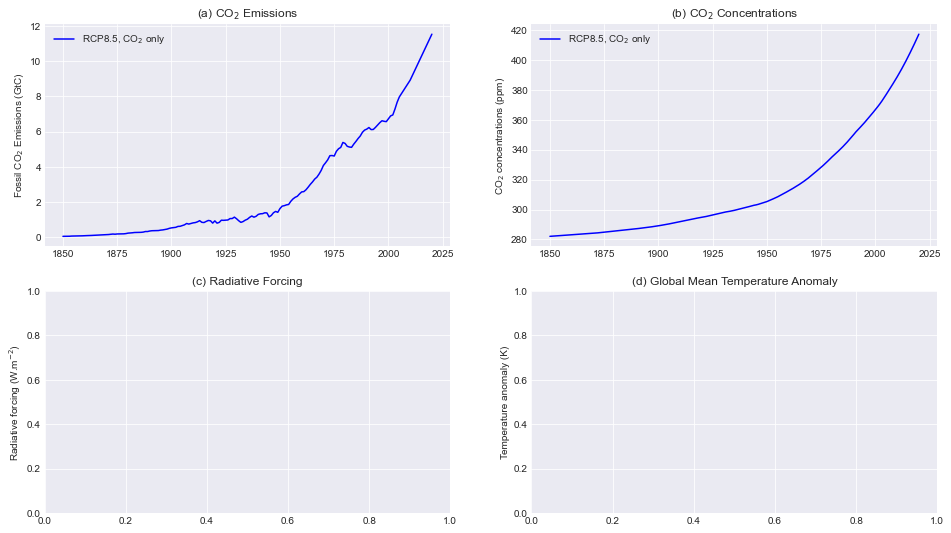

<Figure size 1152x648 with 0 Axes>

In [238]:
# plot annual CO2 emissions and concentrations
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# plot CO2 emissions
ax1.plot(year_hist, CO2E_hist, color='blue', label='RCP8.5, CO$_2$ only')

# plot CO2 concentrations
ax2.plot(year_hist, C85_hist[:, 0], color='blue', label='RCP8.5, CO$_2$ only')
# add MLO data to ax2
#ax2.plot(...,color='cyan', label='MLO')

# plot total radiative forcing, i.e. the sum of all columns of the F85_hist array
#ax3.plot(..., color='r', label='RCP8.5')

# plot RF just for CO2
#ax3.plot(..., color='blue',label="RCP8.5, CO$_2$ only")

# plot observational temperature anomalies
# T_gis_adj
#ax4.plot(...,color='m',label="GISTEMP")
# T_had_adj
#ax4.plot(...,color='orange',label="HadCRUT5")

# plot FaIR temperature anomalies
#ax4.plot(..., color='r', label='RCP8.5')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.set_title('(a) CO$_2$ Emissions')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax2.set_title('(b) CO$_2$ Concentrations')
ax2.legend()
ax3.set_ylabel('Radiative forcing (W.m$^{-2}$)')
ax3.set_title('(c) Radiative Forcing')
ax3.legend()
ax4.set_ylabel('Temperature anomaly (K)')
ax4.set_title('(d) Global Mean Temperature Anomaly')
ax4.legend()
plt.show()
plt.savefig("Fig4.png")

Great! Now, we see a bit better agreement. 

Let's compute the model bias for the 1961-1990 time period again. Let's just compute the bias relative to the HadCRUT5 data set for now. Remember to compute the bias relative to the *adjusted* HadCRUT5 data set.

In [240]:
# compute the temperature bias for the 1961-1990 time period
#T_bias = 
#print("The FaIR temperature bias is ", np.round(T_bias,2), " K")

### Validation of Equilibrium Climate Sensitivity

The final validation test that we will conduct with FaIR is to test the **equilibrium climate sensitivity** (ECS) of FaIR. Recall that the ECS is the equilibrium temperature response to a doubling of CO$_2$ concentrations. 

To perform this test, we will run FaIR in the *concentration-driven* mode. It is possible to drive FaIR with concentrations rather than emissions. To do this, we will set the `emissions_driven` keyword to `False` and specify the concentrations with `C`. The function still returns the `C, F, T`.

We will run the model starting with pre-industrial CO2 concentrations and then we will double them.

(-0.5, 3.0)

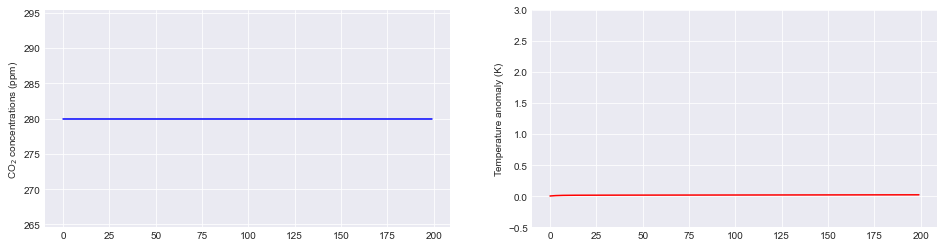

In [241]:
# create an array of CO2 concentrations

# initialize with a pre-industrial concentration of 280 ppm
C_conc = 280*np.ones(200)

# after 25 years, double it for the remainder of the run
# uncomment and complete the line below
#C_conc[25:] = 
    
# run FaIR in concentration-driven mode    
C,F,T = fair.forward.fair_scm(emissions_driven=False,C = C_conc,useMultigas=False)

# plot 
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# plot the CO2 concentrations
ax1.plot(range(0, C_conc.size), C, color='blue')
ax1.set_ylabel('CO$_2$ concentrations (ppm)')

# plot the temperature anomalies
ax2.plot(range(0, C_conc.size), T, color='red')
ax2.set_ylabel('Temperature anomaly (K)')
ax2.set_ylim(-0.5,3)

Has FaIR reached equilibrium? Extend the length of the concentration array to integrate FaIR for more years. 
- Roughly when does FaIR reach equilibrium? 
- What is the resulting ECS for FaIR? How does this compare to the best estimate reported in the IPCC AR6?

We have now examined whether or not FaIR provides a reasonable representation of the climate system response to emissions. In the next lab, we will use FaIR to do a more direct quantification of the human influence on surface temperature change.